# Executive Certificate Big Data - Centrale Supelec - Octobre 2018
# Détection d’intrusion réseau à l’aide de l’apprentissage automatique
### Notebook : sp1_explore-process-data
### Auteur : Ahmed Mekaouar

# Exploring and processing data

In [1]:
# imports
import os
import glob2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the raw data

In [2]:
raw_data_path = os.path.join(os.path.pardir,'data','raw')

In [3]:
df = pd.concat([pd.read_csv(f , index_col='Flow ID' , low_memory=False) for f in glob2.glob(raw_data_path + '/*.csv')],sort=False)
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('Bytes/s', 'BytesPs')

### Exploring structure

In [4]:
df.shape

(2830743, 85)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 192.168.10.5-8.254.250.126-49188-80-6 to 192.168.10.3-192.168.10.5-53-59851-17
Data columns (total 85 columns):
ACKFlagCount               int64
ActiveMax                  float64
ActiveMin                  float64
ActiveStd                  float64
AveragePacketSize          float64
AvgBwdSegmentSize          float64
AvgFwdSegmentSize          float64
BwdAvgBytes/Bulk           int64
BwdAvgPackets/Bulk         int64
BwdHeaderLength            int64
BwdIATMax                  float64
BwdIATMean                 float64
BwdIATMin                  float64
BwdIATStd                  float64
BwdPSHFlags                int64
BwdPacketLengthMean        float64
BwdPacketLengthMin         float64
BwdPacketLengthStd         float64
BwdPackets/s               float64
BwdURGFlags                int64
CWEFlagCount               int64
DestinationIP              object
DestinationPort            int64
Down/UpRatio               float64
ECE

In [7]:
# Using df.info() details we can see that FlowPackets/s and FlowBytesPs are considered to be objects 
# -> they need to be converted to numeric values.
# There are some categorical nominal features we need to deal with:
# SourceIP , DestinationIP  , SourcePort , DestinationPort , ExternalIP , Timestamp , Protocol

In [13]:
df.head()

,SourceIP,SourcePort,DestinationIP,DestinationPort,Protocol,Timestamp,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,...,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label,ExternalIP
Flow ID,,,,,,,,,,,,,,,,,,,,,
192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80,192.168.10.5,49188,6,03/07/2017 08:55:58,4,2,0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,NaN
192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80,192.168.10.5,49188,6,03/07/2017 08:55:58,1,2,0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,NaN
192.168.10.14-8.253.185.121-49486-80-6,8.253.185.121,80,192.168.10.14,49486,6,03/07/2017 08:56:22,3,2,0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,NaN
192.168.10.14-8.253.185.121-49486-80-6,8.253.185.121,80,192.168.10.14,49486,6,03/07/2017 08:56:22,1,2,0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,NaN
192.168.10.3-192.168.10.9-88-1031-6,192.168.10.9,1031,192.168.10.3,88,6,03/07/2017 08:56:38,609,7,4,484.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,NaN


In [14]:
# column FwdHeaderLength is duplicated : FwdHeaderLength.1 -> duplicate column to be removed

In [15]:
df.duplicated()

Flow ID
192.168.10.5-8.254.250.126-49188-80-6        False
192.168.10.5-8.254.250.126-49188-80-6        False
192.168.10.14-8.253.185.121-49486-80-6       False
192.168.10.14-8.253.185.121-49486-80-6       False
192.168.10.3-192.168.10.9-88-1031-6          False
192.168.10.3-192.168.10.9-88-1032-6          False
192.168.10.3-192.168.10.9-88-1033-6          False
192.168.10.3-192.168.10.9-88-1034-6          False
192.168.10.3-192.168.10.9-88-1034-6          False
192.168.10.3-192.168.10.9-88-1036-6          False
192.168.10.3-192.168.10.9-389-1035-6         False
192.168.10.3-192.168.10.9-88-1039-6          False
192.168.10.3-192.168.10.9-88-1040-6          False
192.168.10.3-192.168.10.9-88-1045-6          False
192.168.10.3-192.168.10.9-88-1045-6          False
192.168.10.3-192.168.10.9-88-1046-6          False
192.168.10.3-192.168.10.9-88-1047-6          False
192.168.10.3-192.168.10.9-88-1050-6          False
192.168.10.3-192.168.10.9-88-1052-6          False
192.168.10.3-192.168.10

In [16]:
# duplicated rows need to be removed. Keeping the first one!

### Data analysis

In [17]:
pd.options.display.max_columns = None # Added to remove columns number restriction
df.describe(include='all')

,SourceIP,SourcePort,DestinationIP,DestinationPort,Protocol,Timestamp,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytesPs,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,FwdURGFlags,FwdHeaderLength,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label,ExternalIP
count,2801880,2.801880e+06,2801880,2.801880e+06,2.801880e+06,2801880,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2.801880e+06,2801880,40773
unique,17001,NaN,19107,NaN,NaN,27917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,4
top,172.16.0.1,NaN,192.168.10.3,NaN,NaN,7/7/2017 2:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENIGN,205.174.165.71
freq,539233,NaN,684566,NaN,NaN,46110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2348943,24814
mean,NaN,4.115811e+04,NaN,8.097091e+03,9.909682e+00,NaN,1.454353e+07,9.395798e+00,1.045715e+01,5.480588e+02,1.626748e+04,2.062886e+02,1.878138e+01,5.787528e+01,6.825566e+01,8.522419e+02,4.144817e+01,3.003369e+02,3.273332e+02,1.451823e+06,6.997835e+04,1.273120e+06,2.840199e+06,8.908805e+06,1.604170e+05,1.424034e+07,2.559449e+06,3.151538e+06,8.768744e+06,1.020356e+06,9.821912e+06,1.787086e+06,1.439085e+06,4.577651e+06,9.679994e+05,4.650556e-02,6.352877e-05,2.291994e+02,2.468236e+02,6.293400e+04,7.044351e+03,1.652915e+01,9.308035e+02,1.692397e+02,2.889349e+02,4.728772e+05,3.400146e-02,4.650556e-02,2.426942e-04,2.992434e-01,3.133196e-01,9.523606e-02,6.352877e-05,2.437649e-04,6.857032e-01,1.890749e+02,5.787528e+01,3.003369e+02,9.395798e+00,5.480482e+02,1.045715e+01,1.626713e+04,7.011701e+03,1.997457e+03,5.445094e+00,2.611166e+01,8.112402e+04,4.118448e+04,1.531113e+05,5.788418e+04,8.048143e+06,4.954178e+05,8.420962e+06,7.657973e+06,NaN,NaN
std,NaN,2.231311e+

In [18]:
std=df.describe().loc['std']

In [19]:
std[std==0]

Series([], Name: std, dtype: float64)

In [20]:
# Here are some observations about the data:
# Flow timeout is set to 120 s
# Some columns have a std = 0 so we need to remove them.
# There are some comluns with negative min values knowing that these value are basically lengths and sizes-> to be checked.

In [21]:
df[df.FlowDuration<0].Label.value_counts()

Series([], Name: Label, dtype: int64)

In [22]:
df[df.BwdHeaderLength<0].Label.value_counts()

Series([], Name: Label, dtype: int64)

In [23]:
df[df.FwdHeaderLength<0].Label.value_counts()

Series([], Name: Label, dtype: int64)

In [24]:
df[df.FwdIATMin<0].Label.value_counts()

Series([], Name: Label, dtype: int64)

In [28]:
df[df.min_seg_size_forward<0].Label.value_counts()

Series([], Name: Label, dtype: int64)

In [21]:
df[df.FlowIATMin<0].Label.value_counts()

BENIGN           2703
DoS Hulk          159
DDoS               13
DoS GoldenEye       5
Heartbleed          4
FTP-Patator         4
SSH-Patator         2
Infiltration        1
Name: Label, dtype: int64

In [22]:
df[df.Init_Win_bytes_backward<-1].Label.value_counts()

Series([], Name: Label, dtype: int64)

In [23]:
df[df.Init_Win_bytes_forward<=0].Label.value_counts()

BENIGN      1041992
DoS Hulk      58934
DDoS             27
PortScan          7
Name: Label, dtype: int64

In [23]:
# https://osqa-ask.wireshark.org/questions/27648/how-can-i-get-congestion-window-from-traces
#The CWND is just an internal variable on the sender side to manage the amount of bytes that it is allowed to send at any time. The value of CWND is calculated according to a certain algorithm (see the RFC).

In [25]:
df[df.FlowIATMin<0].Label.value_counts()

BENIGN           2703
DoS Hulk          159
DDoS               13
DoS GoldenEye       5
Heartbleed          4
FTP-Patator         4
SSH-Patator         2
Infiltration        1
Name: Label, dtype: int64

In [26]:
# -> FlowDuration with negative values should be removed. No need to spend effort ti impute them since 115 is too little
# compared to the majority class count (BENIGN)

In [27]:
# Displaying columns with null values (NaN)
null_columns=df.columns[df.isnull().any()]
print(null_columns)

Index(['ExternalIP', 'FlowBytesPs'], dtype='object')


In [28]:
# Exploring rows with FlowBytesPs = NaN
df[df.FlowBytesPs.isnull()].head()
# -> We can see from the head results that FlowDuration is 0 for these 5 rows

,ACKFlagCount,ActiveMax,ActiveMin,ActiveStd,AveragePacketSize,AvgBwdSegmentSize,AvgFwdSegmentSize,BwdAvgBytes/Bulk,BwdAvgPackets/Bulk,BwdHeaderLength,BwdIATMax,BwdIATMean,BwdIATMin,BwdIATStd,BwdPSHFlags,BwdPacketLengthMean,BwdPacketLengthMin,BwdPacketLengthStd,BwdPackets/s,BwdURGFlags,CWEFlagCount,DestinationIP,DestinationPort,Down/UpRatio,ECEFlagCount,FlowDuration,FlowIATMax,FlowIATMean,FlowIATMin,FlowIATStd,FlowPackets/s,FwdAvgBulkRate,FwdAvgPackets/Bulk,FwdHeaderLength,FwdHeaderLength.1,FwdIATMax,FwdIATMean,FwdIATMin,FwdIATStd,FwdPacketLengthMax,FwdPacketLengthMean,FwdPacketLengthMin,FwdPacketLengthStd,FwdURGFlags,IdleMax,IdleMin,IdleStd,Init_Win_bytes_backward,Label,MaxPacketLength,MinPacketLength,PSHFlagCount,PacketLengthMean,PacketLengthStd,PacketLengthVariance,Protocol,RSTFlagCount,SYNFlagCount,SourceIP,SourcePort,SubflowBwdBytes,SubflowBwdPackets,SubflowFwdBytes,Timestamp,TotalBackwardPackets,TotalFwdPackets,TotalLengthofBwdPackets,URGFlagCount,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,BwdAvgBulkRate,BwdIATTotal,BwdPacketLengthMax,ExternalIP,FINFlagCount,FlowBytesPs,FwdAvgBytes/Bulk,FwdIATTotal,FwdPSHFlags,FwdPackets/s,IdleMean,Init_Win_bytes_forward,SubflowFwdPackets,TotalLengthofFwdPackets
Flow ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
192.168.10.25-54.230.38.215-49240-443-6,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,32,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,54.230.38.215,443,1.0,0,0,0.0,0.0,0.0,0.0,Infinity,0,0,32,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,122,BENIGN,0.0,0.0,0,0.0,0.0,0.0,6,0,0,192.168.10.25,49240,0,1,0,03/07/2017 09:15:45,1,1,0.0,1,0,32,0.0,0,0.0,0.0,NaN,0,NaN,0,0.0,0,0.0,0.0,33304,1,0.0
172.217.6.234-192.168.10.12-80-44476-6,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,32,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,172.217.6.234,80,1.0,0,0,0.0,0.0,0.0,0.0,Infinity,0,0,32,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,340,BENIGN,0.0,0.0,0,0.0,0.0,0.0,6,0,0,192.168.10.12,44476,0,1,0,03/07/2017 09:39:01,1,1,0.0,0,0,32,0.0,0,0.0,0.0,NaN,0,NaN,0,0.0,0,0.0,0.0,256,1,0.0
192.168.10.50-192.168.10.51-21-57073-6,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,32,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,192.168.10.50,21,1.0,0,0,0.0,0.0,0.0,0.0,Infinity,0,0,32,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,227,BENIGN,0.0,0.0,0,0.0,0.0,0.0,6,0,0,192.168.10.51,57073,0,1,0,03/07/2017 09:41:58,1,1,0.0,1,0,32,0.0,0,0.0,0.0,NaN,0,NaN,0,0.0,0,0.0,0.0,229,1,0.0
192.168.10.25-52.84.145.201-49685-443-6,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,32,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,192.168.10.25,49685,1.0,0,0,0.0,0.0,0.0,0.0,Infinity,0,0,32,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,65535,BENIGN,0.0,0.0,0,0.0,0.0,0.0,6,0,0,52.84.145.201,443,0,1,0,03/07/2017 09:43:09,1,1,0.0,1,0,32,0.0,0,0.0,0.0,NaN,0,NaN,0,0.0,0,0.0,0.0,134,1,0.0
192.168.10.16-192.168.10.50-42440-21-6,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,32,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,192.168.10.16,42440,1.0,0,0,0.0,0.0,0.0,0.0,Infinity,0,0,32,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,229,BENIGN,0.0,0.0,0,0.0,0.0,0.0,6,0,0,192.168.10.50,21,0,1,0,03/07/2017 09:47:07,1,1,0.0,0,0,32,0.0,0,0.0,0.0,NaN,0,NaN,0,0.0,0,0.0,0.0,227,1,0.0


In [29]:
df[df.FlowBytesPs.isnull()].FlowDuration.unique()

array([0], dtype=int64)

In [30]:
# All rows with FlowDuration should be removed, by removing them we also remove all FlowBytesPs with NaN

In [6]:
attacks_count=df.Label.value_counts()
print (attacks_count)

BENIGN                      2359289
DoS Hulk                     231073
PortScan                     158930
DDoS                          41835
DoS GoldenEye                 10293
FTP-Patator                    7938
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1966
Web Attack Brute Force         1507
Web Attack XSS                  652
Infiltration                     36
Web Attack Sql Injection         21
Heartbleed                       11
Name: Label, dtype: int64


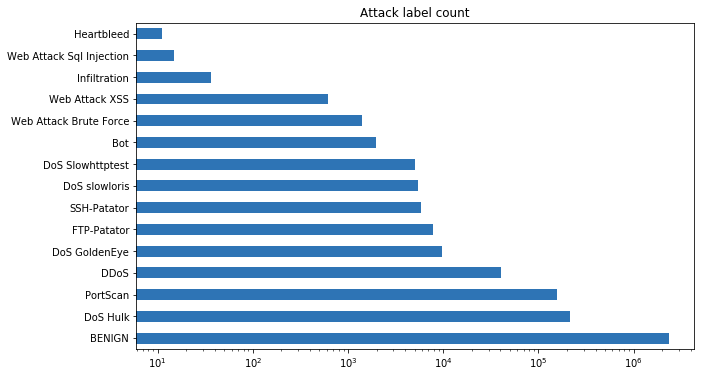

In [11]:
# to set x-axis to logscale since the data set is very unbalanced
plt.xscale('log')
#figsize=(10,5), fontsize=10,
attacks_count.plot(kind='barh', title='Attack label count',figsize=(10,6), fontsize=10, color ='#2e74b5');

In [25]:
df.Label.value_counts(normalize=True)

BENIGN                      0.833452
DoS Hulk                    0.081630
PortScan                    0.056144
DDoS                        0.014779
DoS GoldenEye               0.003636
FTP-Patator                 0.002804
SSH-Patator                 0.002083
DoS slowloris               0.002048
DoS Slowhttptest            0.001943
Bot                         0.000695
Web Attack Brute Force      0.000532
Web Attack XSS              0.000230
Infiltration                0.000013
Web Attack Sql Injection    0.000007
Heartbleed                  0.000004
Name: Label, dtype: float64

In [34]:
# the dataset is unbalanced

### Traffic by protocol

In [8]:
pd.crosstab(df.Label,df.Protocol)
# can add a plot also

Protocol,0,6,17
Label,,,
BENIGN,1690,1350469,996784
Bot,0,1946,0
DDoS,0,40772,0
DoS GoldenEye,0,9616,0
DoS Hulk,0,215434,0
DoS Slowhttptest,0,5083,0
DoS slowloris,0,5408,0
FTP-Patator,0,7911,0
Heartbleed,0,11,0


### Features cleaning

In [5]:
# Before displaying the distribution, features are cleaned according to the issues found so far

# 1. Remove all rows with FlowDuration <= 0
df.drop(df[(df.FlowDuration<=0)].index,inplace=True)

# 2. FlowBytes/Ps and FlowPackets/s need to be transformed to numeric 
df['FlowBytesPs'] = df['FlowBytesPs'].apply(pd.to_numeric)
df['FlowPackets/s'] = df['FlowPackets/s'].apply(pd.to_numeric)

# 3. Remove duplicated column FwdHeaderLength.1
df.drop(columns=['FwdHeaderLength.1'],inplace=True)

# 4. Drop duplicates and keep first instance for each duplicated row
df.drop_duplicates(keep='first',inplace=True)

# 5. remove all features with std = 0
zero_variance=['BwdAvgBytes/Bulk','BwdAvgPackets/Bulk','BwdPSHFlags','BwdURGFlags',
               'FwdAvgBulkRate','FwdAvgPackets/Bulk','BwdAvgBulkRate','FwdAvgBytes/Bulk']
df.drop(columns = zero_variance,inplace=True)
##### zero variance features should not be removed at this level but in next notebook

# 6. outliers to be removed
df.drop(df[(df.BwdHeaderLength<0)].index,inplace=True)
df.drop(df[(df.FwdHeaderLength<0)].index,inplace=True)
df.drop(df[(df.FwdIATMin<0)].index,inplace=True)
#df.drop(df[(df.min_seg_size_forward<0)].index,inplace=True)

# 7. outliers to be replaced
df.loc[df['FlowIATMin'] < 0, 'FlowIATMin'] = 0
df.loc[df['Init_Win_bytes_forward'] <= 0, 'Init_Win_bytes_forward'] = 1
df.loc[df['Init_Win_bytes_backward'] <= 0, 'Init_Win_bytes_backward'] = 1

### Distribution example

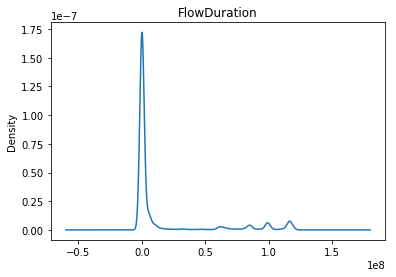

In [37]:
# Distribution of FlowDuration
df.FlowDuration.plot(kind='kde', title='FlowDuration');

In [38]:
df.FlowDuration.skew()

2.1887538999696785

In [39]:
LogFlowDuration=np.log(df.FlowDuration )

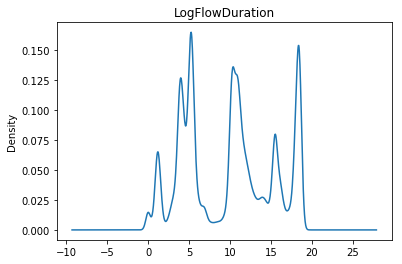

In [40]:
# Distribution of FlowDuration
LogFlowDuration.plot(kind='kde', title='LogFlowDuration');

In [41]:
LogFlowDuration.skew()
# skewness is near to 0 but the distribution is far from being a normal one.

0.095559333317235151

In [4]:
#Traffic Analysis

In [22]:
# -> Analysis on SourceIP DestinationIP SourcePort DestinationPort where performed for all attacks to get table :
#    Tableau 2-Analyse des attaques
#df[(df.Label=='DoS Hulk')].SourceIP.value_counts() 
#df[(df.Label=='DoS Hulk')].DestinationIP.value_counts() 
#df[(df.Label=='DoS Hulk')].SourcePort.unique() 
#df[(df.Label=='DoS Hulk')].DestinationPort.unique() 

### Categorical features
#### SourceIP , DestinationIP  , SourcePort , DestinationPort , ExternalIP , Timestamp , Protocol
##### These features are not flow features, this said if any of these features can enhance the performance we can take it in the model. So let is explore if any of these features is descriminative regarding attacks.
##### 1/ SourceIP : Except Bot, all attacks comes the firewall 172.16.0.1 as any other regular traffic. There is no point using SourceIP as a feature.
##### 2/ DestinationIP : Almost all attacks are destinated to 192.168.10.50 (Web server 16 Public). There is no point as a feature.
##### 3/ SourcePort : There are a multitude of source ports in the dataset and attacks (as regular traffic) are coming mainly from dynamic ports. So there is no point using SourcePort as a feature.
##### 4/ DestinationPort : We can see that almost all attcks are destinated to port 80 (besides ports 21 and 22 for FTP and SSH). I did a test  creating the follwing features DestPortIsHTTP, DestPortIsHTTPS, DestPortDPIsFTP, DestPortDPIsSSH. Random Forest give almost the same result with and without these features.
##### 5/ ExternalIP is set only for DDoS attacks since the NAT was not activated on the firewall for this attack. These IP addresses does not anyway bring any information. I will not take this feature into account.
##### 6/ Timestamp : I make the assuption that 1 flow embedd all the traffic between a source and a destination and that one flow is independant from all other flows. Timestamp could be usefull is it is a time series analysis. This is not the case so timestamp should be discarded.
##### 7/ Protocol: We have already seen that all the dataset attacks are in TCP, the dataset is unbalanced regarding this aspect. Since I'm classifing attacks there is no point keeping this information.

### Remove categorical nominal features

In [6]:
# Creation of 5 new features : DestPortIsHTTP, DestPortIsHTTPS, DestPortDPIsFTP, DestPortDPIsSSH,IsTCP
#df['DestPortIsHTTP'] = np.where((df.DestinationPort == 80), 1, 0)
#df['DestPortIsHTTPS'] = np.where(((df.DestinationPort == 443)|(df.DestinationPort == 444)), 1, 0)
#df['DestPortIsFTP'] = np.where((df.DestinationPort == 21), 1, 0)
#df['DestPortIsSSH'] = np.where((df.DestinationPort == 22), 1, 0)
#df['IsTCP'] = np.where((df.Protocol == 6), 1, 0)
# Classification and anomly detection did not show any improvement using these features
# Features removed
col_list = ['SourceIP', 'DestinationIP', 'SourcePort', 'Timestamp','ExternalIP','DestinationPort','Protocol']
df.drop(columns=col_list,axis=1,inplace = True)

### Put Label column at last position

In [7]:
columns = [column for column in df.columns if column != 'Label']
columns = columns + ['Label']
df = df[columns]

### Features correlation

In [47]:
from matplotlib.colors import ListedColormap

def plot_corr(df):
    cmap = ListedColormap(['k', 'w', 'r'])
    corr = df.drop(columns=['Label']).corr()
    fig, axes = plt.subplots(figsize=(15, 15))
    axes.matshow(corr, cmap=plt.cm.Blues)
    #plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);

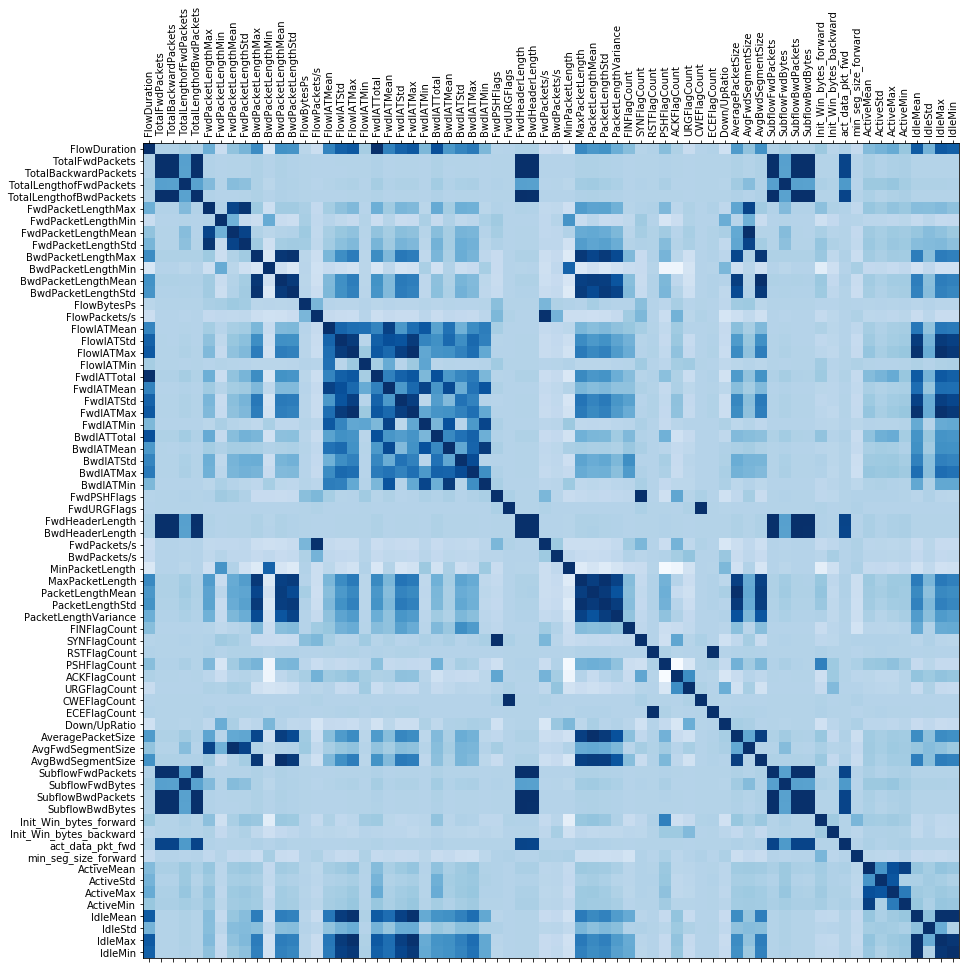

In [48]:
plot_corr(df)

### Save the processed data in intermediary path

In [8]:
intermediary_data_path = os.path.join(os.path.pardir,'data','intermediary')
write_baseline_train_file = os.path.join(intermediary_data_path, 'train_baseline.csv')
write_baseline_test_file = os.path.join(intermediary_data_path, 'test_baseline.csv')
write_attacks_train_file = os.path.join(intermediary_data_path, 'train_attacks.csv')
write_attacks_test_file = os.path.join(intermediary_data_path, 'test_attacks.csv')
write_novelty_file = os.path.join(intermediary_data_path, 'novelty.csv')

In [9]:
from sklearn.model_selection import train_test_split
df_baseline_train , df_baseline_test = train_test_split(df[df.Label=='BENIGN'], test_size=0.1, random_state=1)
df_attacks_train , df_attacks_test = train_test_split(df[(df.Label!='BENIGN')&(df.Label!='DoS Slowhttptest')], test_size=0.1, random_state=1)

df_baseline_train.to_csv(write_baseline_train_file) 
df_baseline_test.to_csv(write_baseline_test_file) 
df_attacks_train.to_csv(write_attacks_train_file) 
df_attacks_test.to_csv(write_attacks_test_file) 
# I will keep DoS Slowhttptest attack data in a separate file that will be used later (novelty detection)
df[df.Label=='DoS Slowhttptest'].to_csv(write_novelty_file)